# T4 - People and data

Modeling without data is like riding a bicycle while blindfolded – rarely dull, but often you don't get to where you want to go. This tutorial shows how to use data with Covasim. But first, an introduction to people, populations, and contact layers.

## People and contact network layers

Agents in Covasim are contained in an object called `People`, which contains all of the agents' properties, as well as methods for changing them from one state to another (e.g., from susceptible to infected).

Agents interact with each other via one or more *contact layers*. You can think of each agent as a node in a mathematical graph, and each connection as an edge. By default, Covasim creates a single random contact network where each agent is connected to 20 other agents, completely at random. However, this is not a very realistic representation of households, workplaces, schools, etc.

For greater realism, Covasim also comes with a "hybrid" population option, which provides a more realism while still being fast to generate. (It's called "hybrid" because it's a combination of the random network and the [SynthPops](http://synthpops.org) network, described in Tutorial 9, which is much more realistic but requires a lot of data and is computationally intensive.) The hybrid option provides four *contact layers*: households `'h'`, schools `'s'`, workplaces `'w'`, and community interactions `'c'`. Each layer is defined by (a) which agents are connected to which other agents, and (b) the weight of each connection (i.e., transmission probability). Specifically:
* Households are small clusters, usually 2-5 people (depending on country), consisting of a wide variety of ages; this setting has high transmission probability
* Schools are split into classrooms, usually about 20 students each, of students aged 6–22; this setting has medium transmission probability
* Workplaces are clusters of about 5-20 people, aged (approximately) 22-65; this setting has medium transmission probability
* Community contacts (representing parks, restaurants, transport, places of worship, etc.) are estimated as 20 random contacts per day; this setting has low transmission probability

Note that for most countries, you can load default data (age distribution and household size, both from the UN) by using the `location` keyword when creating a sim. For example, to create a realistic (i.e. hybrid) population 10,000 people for Bangladesh and plot the results, you would do:

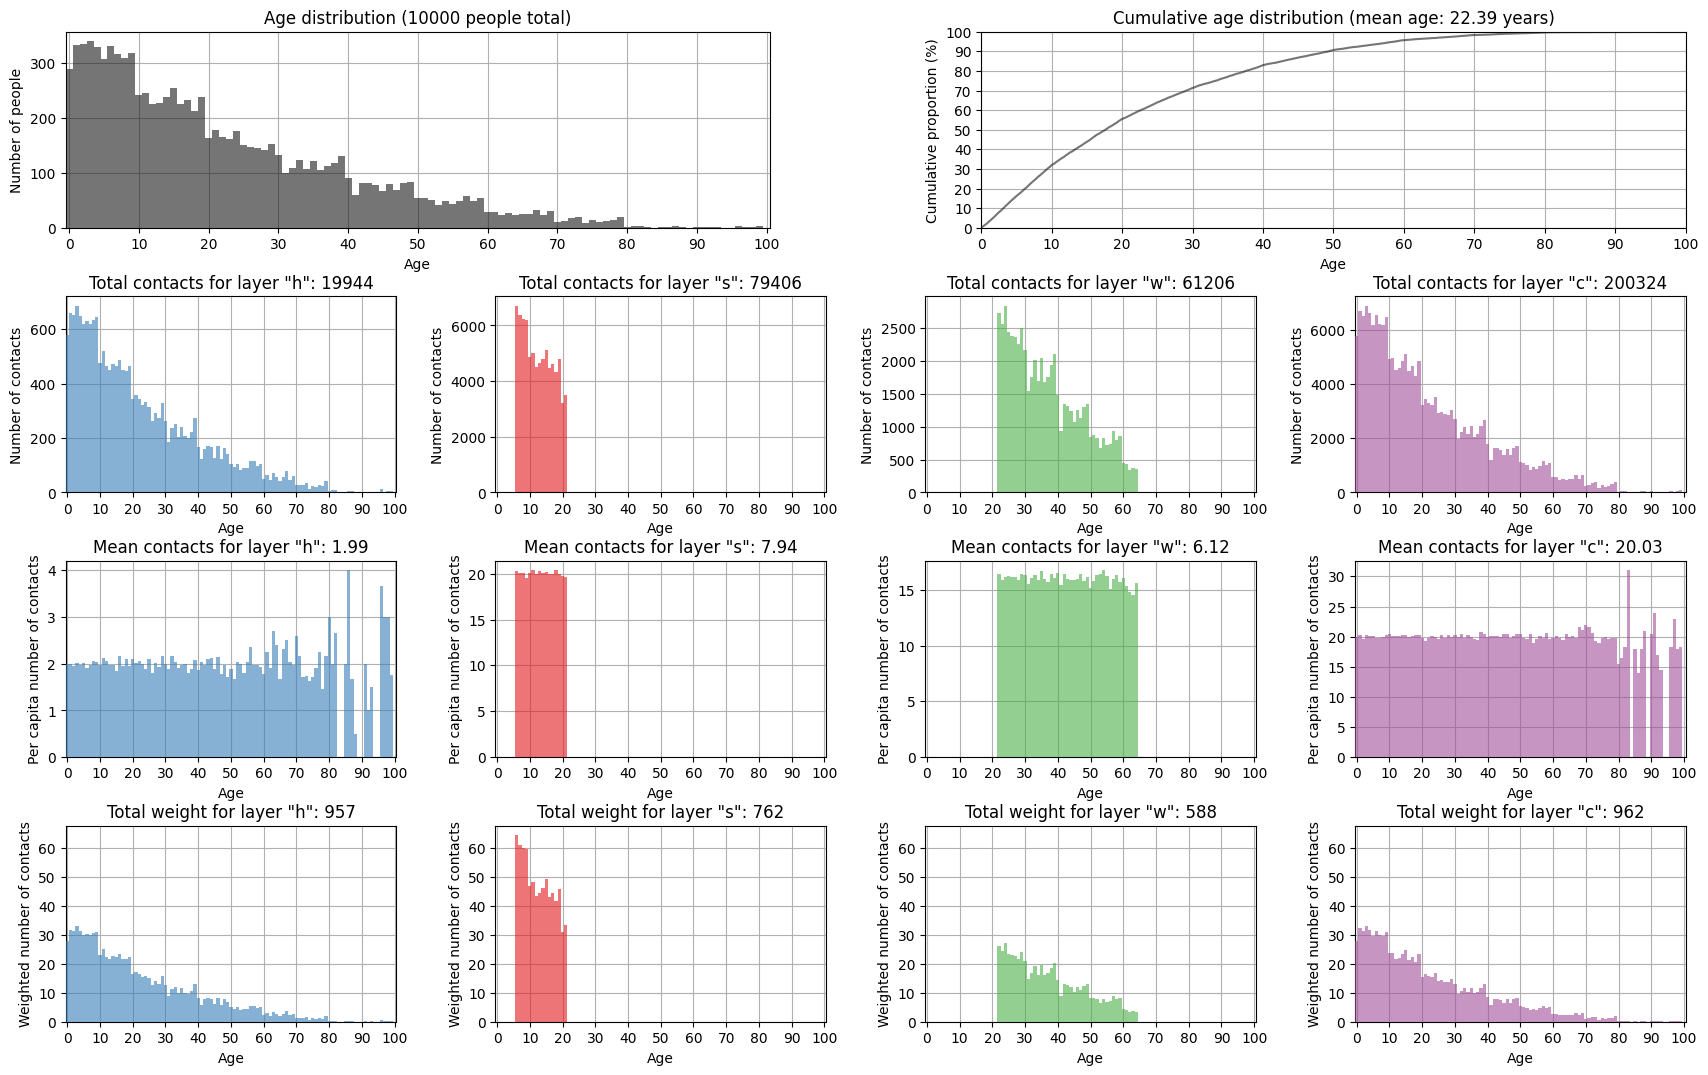

In [11]:
import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

pars = dict(
    pop_size = 10_000, # Alternate way of writing 10000
    pop_type = 'hybrid',
    location = 'Democratic Republic of the Congo', # Case insensitive
)

sim = cv.Sim(pars)
sim.initialize() # Create people
fig = sim.people.plot() # Show statistics of the people

<div class="alert alert-info">

**Note:** For an explanation of population size, total population, and dynamic rescaling, please see the [FAQ](https://docs.idmod.org/projects/covasim/en/latest/faq.html#what-are-the-relationships-between-population-size-number-of-agents-population-scaling-and-total-population).
    
</div>

## Demographic data

Covasim includes pre-downloaded data on country (and US state) age distributions and household size distributions. As we saw in Tutorial 1, you can load these data simply by using the `location` parameter. You can show a list of all available locations with `cv.data.show_locations()`. The data themselves are simply a set of dictionaries, and these can be modified directly; for example, to add a custom age distribution for Johannesburg would look like this:

```python
# Note data format and key names!
joburg_pop = {
   '0-9':  286620,
  '10-19': 277020,
  '20-29': 212889,
  '30-39': 161329,
  '40-49': 104399,
  '50-59': 51716,
  '60-69': 36524,
  '70-79': 22581,
  '80+':   7086}

cv.data.country_age_data.data['Johannesburg'] = joburg_pop
```

You can then use these data via `sim = cv.Sim(location='Johannesburg')`.

## Epidemiological data scrapers

Covasim includes a script to automatically download time series data on diagnoses, deaths, and other epidemiological information from several major sources of COVID-19 data. These include the [Corona Data Scraper](https://coronadatascraper.com), the [European Centre for Disease Prevention and
Control](https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases), and the [COVID Tracking Project](https://covidtracking.com). These scrapers provide data for a large number of locations (over 4000 at the time of writing), including the US down to the county level and many other countries down to the district level. The data they download is already in the correct format for Covasim.

## Data input and formats

The correct input data format for Covasim looks like this:

In [3]:
import pandas as pd
df = pd.read_csv('example_data.csv')
print(df)

          date  new_diagnoses  new_tests  new_deaths
0   2020-03-01              1         24           0
1   2020-03-02              3         22           0
2   2020-03-03              2         15           0
3   2020-03-04              8         40           0
4   2020-03-05             20         38           0
5   2020-03-06              9         61           0
6   2020-03-07              6         43           0
7   2020-03-08             13         98           0
8   2020-03-09              6         93           0
9   2020-03-10             25        170           0
10  2020-03-11             28        368           0
11  2020-03-12             27        437           0
12  2020-03-13             22        291           2
13  2020-03-14             43        328           0
14  2020-03-15             76       1147           0
15  2020-03-16             65       1438           1
16  2020-03-17             88       1209           0
17  2020-03-18             86       1269      

The data can be CSV, Excel, or JSON format. There **must** be a column named `date` (not "Date" or "day" or anything else). Otherwise, each column label must start with `new_` (daily) or `cum_` (cumulative) and then be followed by any of: `tests`, `diagnoses`, `deaths`, `severe` (corresponding to hospitalizations), or `critical` (corresponding to ICU admissions). While other columns can be included and will be loaded, they won't be parsed by Covasim. Note that if you enter a `new_` (daily) column, Covasim will automatically calculate a `cum_` (cumulative) column for you.

<div class="alert alert-info">
    
**Note:** Sometimes date information fails to be read properly, especially when loading from Excel files via pandas. If you encounter this problem, see Tutorial 8 for help on fixing this.
    
</div>

This example shows how a simulation can load in the data, and how it automatically plots it. (We'll cover interventions properly in the next tutorial.)

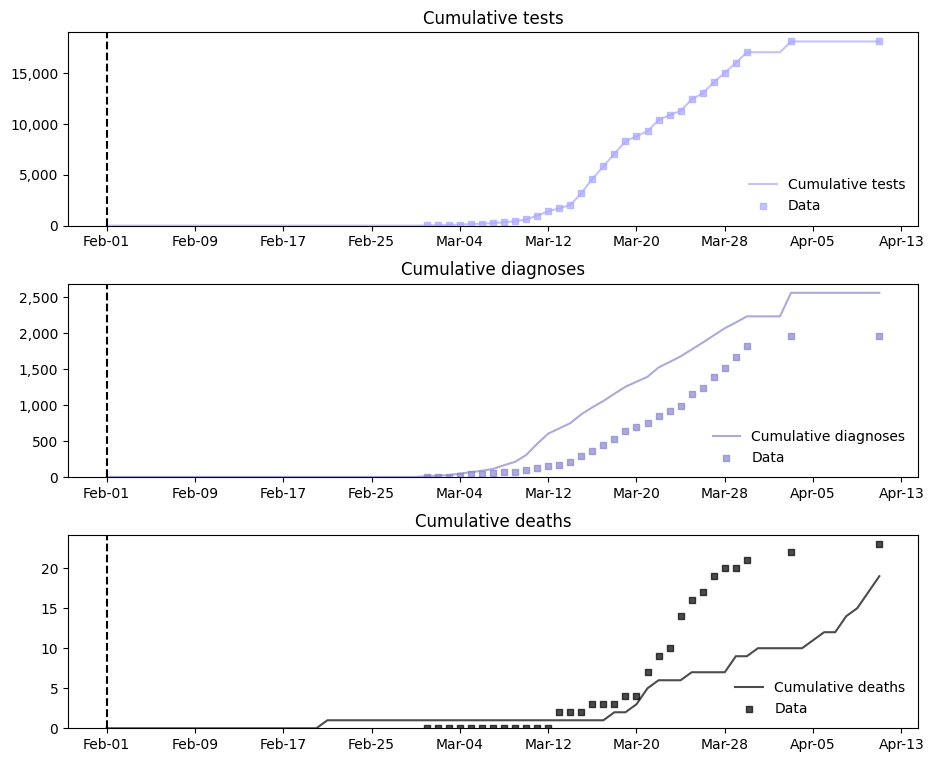

In [4]:
pars = dict(
    start_day = '2020-02-01',
    end_day   = '2020-04-11',
    beta      = 0.015,
)
sim = cv.Sim(pars=pars, datafile='example_data.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(to_plot=['cum_tests', 'cum_diagnoses', 'cum_deaths'])

As you can see, this is not a great fit to data – but we'll come to calibration in Tutorial 7.